In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

### EPIDEMIC MODEL - FUNDAMENTALS

#### A. Transitions to Outbreaks

Challenge Problem: Outbreak Criteria

In [2]:
def sir_model(y,t,pars):
    S = y[0]
    I = y[1]
    #The model
    dSdt = -pars['beta']*S*I
    dIdt = pars['beta']*S*I-pars['gamma']*I
    dRdt = pars['gamma']*I
    dydt = [dSdt, dIdt, dRdt]
    return dydt

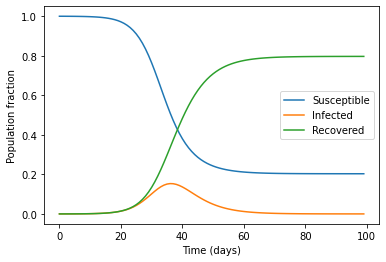

In [3]:
#parameters 
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['beta'] = pars['c']*pars['p'] #transmission rate
pars['gamma'] = 1.0/4 #Recovery rate (1/days)
pars['basR0'] = pars['beta']/pars['gamma']
pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']

#model
t = np.arange(100)
y = integrate.odeint(sir_model, np.array([pars['S0'],pars['I0'], 0])/pars['N'], t, args=(pars,))

#plot results
plt.plot(t,y)
plt.xlabel('Time (days)')
plt.ylabel('Population fraction')
plt.legend(['Susceptible', 'Infected', 'Recovered'])

plt.show()

In [4]:
R_0 = pars['beta']/pars['gamma']
print(R_0)

2.0


Since R_0 > 1, then the disease will spread

When changing the value of p to 0.01 – will the disease spread, why or why not?

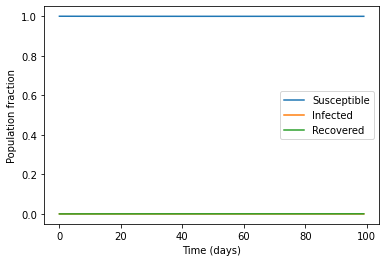

In [5]:
#parameters 
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.01 # Probability of infectious contact
pars['beta'] = pars['c']*pars['p'] #transmission rate
pars['gamma'] = 1.0/4 #Recovery rate (1/days)
pars['basR0'] = pars['beta']/pars['gamma']
pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']

#model
t = np.arange(100)
y = integrate.odeint(sir_model, np.array([pars['S0'],pars['I0'], 0])/pars['N'], t, args=(pars,))

#plot results
plt.plot(t,y)
plt.xlabel('Time (days)')
plt.ylabel('Population fraction')
plt.legend(['Susceptible', 'Infected', 'Recovered'])

plt.show()

In [6]:
R_0 = pars['beta']/pars['gamma']
print(R_0)

0.8


Since R_0 < 1, then the disease will not spread

#### B. Speed, Strength, and Size


1. Strength and Speed

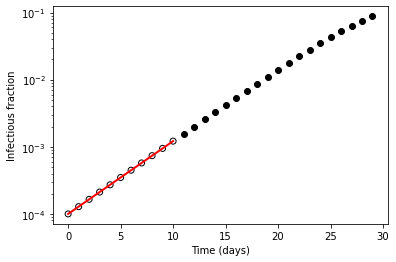

In [7]:
#parameters 
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['beta'] = 0.5 #transmission rate
pars['gamma'] = 0.25 #Recovery rate (1/days)
# pars['basR0'] = 1
pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']

t = np.arange(11)
y = integrate.odeint(sir_model, np.array([pars['S0'], pars['I0'], 0])/pars['N'], t, args=(pars,))

#find the slope
p = np.polyfit(t,np.log(y[:,1]),1)

#plot the data and overlay the best-fit exponential
fig = plt.figure()
ax = fig.gca()
plt.scatter(t,y[:,1],color='k',facecolor = 'none')
ax.set_yscale('log')
plt.plot(t,np.exp(p[0]*t+p[1]),color='r',linewidth=2)

#use solid points for the future k
t = np.arange(30)
y = integrate.odeint(sir_model, np.array([pars['S0'],pars['I0'],0])/pars['N'], t, args = (pars,))
tmpi = np.argwhere(t>10)
plt.scatter(t[tmpi],y[tmpi,1],color='k')

plt.xlabel('Time (days)')
plt.ylabel('Infectious fraction')

plt.show()

In [8]:
#print(Strength, R_0)
R_0 = pars['beta']/pars['gamma']
print(R_0)

2.0


In [9]:
#print(Speed, r)
r = p[0]
print(r)

0.2496465475724469


,Transmission (β),Recovery (γ),Strength (R0),Speed (r)
0,0.50,0.40,1.25,0.099778
1,1.00,0.50,2.00,0.495404
2,0.25,0.50,0.50,-0.250038
3,0.75,0.25,3.00,0.497388


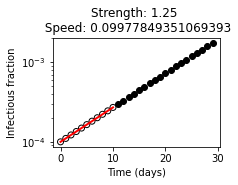

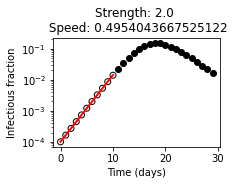

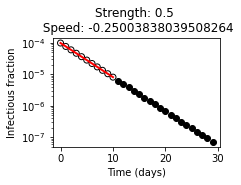

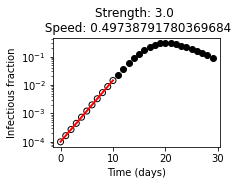

In [10]:
#parameters 
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['beta'] = 0.5 #transmission rate
pars['gamma'] = 0.25 #Recovery rate (1/days)

pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']

beta_list = [0.5, 1, 0.25, 0.75]
gamma_list = [0.4, 0.5, 0.5, 0.25]

#store values of R_0 and r 
R_0_list = []
r_list = []

for i in range(len(beta_list)):
    t = np.arange(11)
    pars['beta'] = beta_list[i]
    pars['gamma'] = gamma_list[i]
    y = integrate.odeint(sir_model, np.array([pars['S0'], pars['I0'], 0])/pars['N'], t, args=(pars,))
    
    #find slope
    p = np.polyfit(t,np.log(y[:,1]),1)
    
    #compute and store values of R_0
    R_0 = pars['beta']/pars['gamma']
    R_0_list.append(R_0)
    
    #store values of r in the list
    r = p[0]
    r_list.append(r)
    
    #plot the data and overlay the best-fit exponential
    fig = plt.figure(figsize=(3,2))
    ax = fig.gca()
    plt.scatter(t,y[:,1],color='k',facecolor = 'none')
    ax.set_yscale('log')
    plt.plot(t,np.exp(p[0]*t+p[1]),color='r',linewidth=2)
    plt.title('Strength: {} \n Speed: {}'.format(R_0_list[i], p[0]))

    #use solid points for the future k
    t = np.arange(30)
    y = integrate.odeint(sir_model, np.array([pars['S0'],pars['I0'],0])/pars['N'], t, args = (pars,))
    tmpi = np.argwhere(t>10)
    plt.scatter(t[tmpi],y[tmpi,1],color='k')  
    plt.xlabel('Time (days)')
    plt.ylabel('Infectious fraction')

df = pd.DataFrame([beta_list, gamma_list, R_0_list, r_list]).T
df.rename(columns={0:'Transmission (β)', 1:'Recovery (γ)', 2:'Strength (R0)', 3:'Speed (r)'}, inplace=True)
df

2. Strength and Size

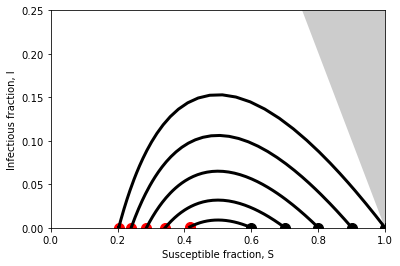

In [11]:
#Parameters
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['beta'] = 0.5 #transmission rate
pars['gamma'] = 0.25 #Recovery rate (1/days)
pars['basR0'] = pars['beta']/pars['gamma']
pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']
pars['N'] = 10000
pars['S0_range'] = np.array([0.6, 0.7, 0.8, 0.9, 0.999])
pars['I0_range'] = 1/pars['N']*np.ones(5)
pars['R0_range'] = 1 - pars['S0_range'] - pars['I0_range']

# Run the model
fig = plt.figure()
ax = fig.gca()
plt.xlim([0,1])
plt.ylim([0,0.25])
for i in range(len(pars['S0_range'])):
    t = np.arange(200)
    y = integrate.odeint(sir_model, [pars['S0_range'][i], pars['I0_range'][i], pars['R0_range'][i]], t, args=(pars,))
    plt.plot(y[:,0],y[:,1],color='k',linewidth=3)
    plt.scatter(y[-1,0],y[-1,1],color='r',s=100)
    plt.scatter(y[0,0],y[0,1],color='k',s=100)
#Show the excluded regime
from matplotlib.patches import Polygon
verts = [(1,0), (1,0.25), (0.75,0.25)]
poly = Polygon(verts,facecolor=[0.8,0.8,0.8])
ax.add_patch(poly)

plt.xlabel('Susceptible fraction, S')
plt.ylabel('Infectious fraction, I')

plt.show()

Challenge problem: Strength-Size Relationships in Phase Space

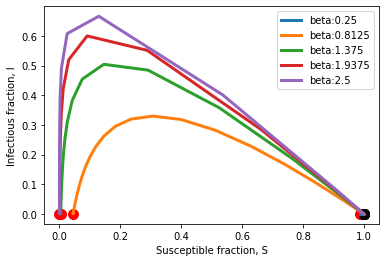

In [12]:
#Parameters
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['gamma'] = 0.25 #Recovery rate (1/days)
pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']
pars['N'] = 10000
pars['S0_range'] =  pars['N']-pars['I0']* 0.8
pars['R0_range'] = 1 - pars['S0_range'] - pars['I0']

beta_range = np.linspace(0.25, 2.5, 5)

for i in range(len(beta_range)):
    t = np.arange(1000)
    pars['beta'] = beta_range[i]
    y = integrate.odeint(sir_model, np.array([pars['S0'], pars['I0'], 0])/pars['N'], t, args=(pars,))
    plt.plot(y[:,0],y[:,1],linewidth=3, label='beta:{}'.format(beta_range[i]))
    plt.scatter(y[-1,0],y[-1,1],color='r',s=100)
    plt.scatter(y[0,0],y[0,1],color='k',s=100)
    plt.legend()
    
plt.xlabel('Susceptible fraction, S')
plt.ylabel('Infectious fraction, I')
plt.show()

The disease does not always spread. As shown in the plot above, the trajectory of beta = 0.25 is not seen. In this case, when transmission rate is low, the disease does not spread.

#### C. From Outbreaks to Endemics


In [13]:
def si_model(y,t,pars):
    S = y[0]
    I = y[1]

    dSdt = -pars['beta']*S*I + pars['gamma']*I
    dIdt = pars['beta']*S*I - pars['gamma']*I
    dydt = [dSdt, dIdt]
    return dydt


Challenge problem: From Epidemic Outbreaks to Endemics

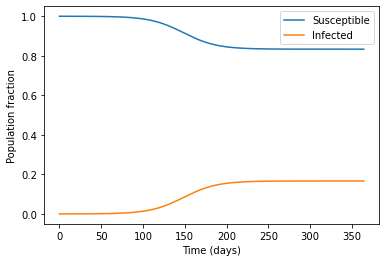

In [14]:
#parameters 
pars={}

pars['N'] = 10000
pars['I0'] = 1
pars['S0'] = pars['N']-pars['I0']
pars['beta'] = 0.3
pars['gamma'] = 0.25

t = np.arange(365)

y = integrate.odeint(si_model, np.array([pars['S0'],pars['I0']])/pars['N'], t, args=(pars,))
#plot results
plt.plot(t,y)
plt.xlabel('Time (days)')
plt.ylabel('Population fraction')
plt.legend(['Susceptible', 'Infected'])

plt.show()

#### III. STOCHASTIC EPIDEMICS


A. Definition of the Model

In [15]:
def stochsim_SIR(y0,trange,pars):
    #Conditions
    t0 = trange[0]
    tf = trange[1]
    t = [t0]
    #we will start y as a list of [S,I,R], where each triplet represents a time point
    y = [y0]
    tcur = t0
    ycur = list(y0)
    ind = 0
    
    #model
    while tcur<tf:
    #check to see if there is an infection
        if ycur[1]==0:
            ind = ind+1
            t.append(tf)
            y.append(ycur)
            break
        #rates
        infrate = pars['beta']*pars['S0']*(pars['I0']/pars['N'])
        recrate = pars['gamma']*pars['I0']
        totrate = infrate + recrate
        dt = -1/totrate * np.log(np.random.uniform())
        tcur = tcur+dt
        
        #event type
        if np.random.uniform()<(infrate/totrate): #infection
            number_infection = int((ycur[0]*pars['beta']*(ycur[1]/pars['N'])) - ycur[1]*pars['gamma'])
            ycur = [ycur[0]-number_infection, ycur[1]+number_infection, ycur[2]]

        else: #recovery
            number_recovery = int(ycur[1]*pars['gamma'])
            ycur = [ycur[0]-number_recovery, ycur[1], ycur[2]+number_recovery]
        ind = ind+1
        t.append(tcur)
        y.append(list(ycur))
    
    #recast y as a numpy array to make it easier to work with
    y = np.array(y)
    return [t,y]

In [16]:
#parameters
pars={}
pars['c'] = 20 #Contacts per unit time (days)
pars['p'] = 0.025 # Probability of infectious contact
pars['beta'] = pars['c']*pars['p'] #transmission rate
pars['gamma'] = 0.25 #Recovery rate (1/days)
pars['tf'] = 60
pars['basR0'] = pars['beta']/pars['gamma']
pars['N'] = 1000
pars['I0'] = 10
pars['S0'] = pars['N'] - pars['I0']

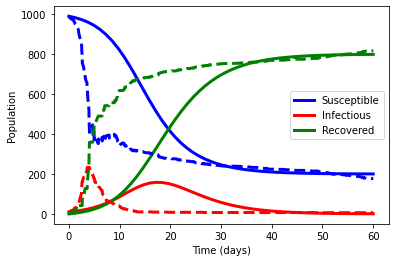

In [17]:
#run the ODE model
t=np.linspace(0,pars['tf'])
y = integrate.odeint(sir_model, np.array([pars['S0'],pars['I0'],0])/pars['N'], t, args=(pars,))
plt.plot(t,pars['N']*y[:,0],linewidth=3,color='b', label='Susceptible')
plt.plot(t,pars['N']*y[:,1],linewidth=3,color='r', label = 'Infectious')
plt.plot(t,pars['N']*y[:,2],linewidth=3,color='g', label = 'Recovered')

#Run the stochastic model
[tsim,ysim] = stochsim_SIR([pars['S0'],pars['I0'],0],[0,pars['tf']],pars)
plt.plot(tsim,ysim[:,0],linewidth=3,color='b',linestyle = '--')
plt.plot(tsim,ysim[:,1],linewidth=3,color='r',linestyle = '--')
plt.plot(tsim,ysim[:,2],linewidth=3,color='g',linestyle = '--')

plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.show()